## Predict the sales of the 300th day and 500th day with the data given

## Step 0: preparing the data:
Read the data and check data types.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import sklearn

In [2]:
df = pd.read_csv('Sales.csv')
df

,Day,Sales (million)
0,1,1.08
1,11,1.06
2,21,0.90
3,31,0.84
4,41,0.72
5,51,0.70
6,61,0.58
7,71,0.55
8,81,0.48
9,91,0.44


In [3]:
df.dtypes

Day                  int64
Sales (million)    float64
dtype: object

## Step 1: Data exploration:
1. There are only one dependent variable and one independent variable. A graph can be plotted to observe the relationship betweent the two variables. 

**The graph below implies that as the day increases, the sales decreases at a stable pace. The correlation coefficient below further veifies that the two variables has a very strong negative linear correlation (r = -0.953).**

Text(0.5, 1.0, 'Sales from Day 1 to Day 231')

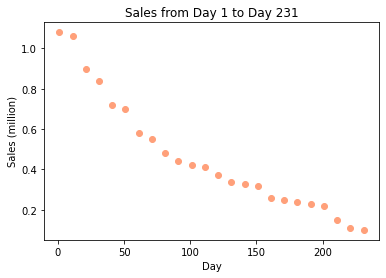

In [4]:
#Visualize the data
x = df['Day']
y = df['Sales (million)']
plt.scatter(x, y,  color='lightsalmon', label='original data')
plt.xlabel('Day')
plt.ylabel('Sales (million)')
plt.title("Sales from Day 1 to Day 231", fontdict=None, loc='center', pad=None)

In [5]:
#Calculate the correlation coefficient using data
r = scipy.stats.pearsonr(x, y)[0]
print(r)

-0.9536139880385662


## Step 2: Model training and prediction (part 1):
1. Linear Regression model is chosen. Data provided is fit into the model and trained.
2. The model then uses the "new data" (i.e. 300, 500) to make a prediction.

**The graph suggests that the model fits the data quite well without overfitting or underfitting. Unfortuantely, the prediction of sales for the 300th day is -0.24 million and -1.02 million for 500th day.**

In [6]:
from sklearn.linear_model import LinearRegression

#Because the dataset is very small and the model is not going to be deployed to deal with larger dataset, it's ok to not split the data into training set and testing set)
x_data = df.drop('Sales (million)', axis=1)
y_data = df.drop('Day', axis=1)

lre=LinearRegression()
lre.fit(x_data, y_data)

#If the dataset is large, we can split the data (see below) and later conduct a cross-validation to validate the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=0) 


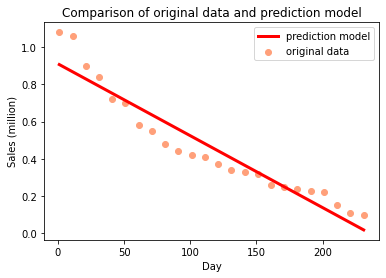

In [7]:
#Visualize the data and the linear regression function
plt.scatter(x_data, y_data,  color='lightsalmon', label='original data')
plt.plot(x_data, lre.predict(x_data), color='red', linewidth=3, label='prediction model')
plt.xlabel('Day')
plt.ylabel('Sales (million)')
plt.title("Comparison of original data and prediction model", fontdict=None, loc='center', pad=None)
plt.legend()
plt.show()

In [8]:
#use the "new data" set to predict the data
x_pred = pd.DataFrame(np.array([[300],[500]]),columns = x_data.columns)
y_pred = lre.predict(x_pred).reshape(-1,)
print(y_pred)

[-0.2479     -1.02007391]


In [9]:
#put the predicted data together into a new dataframe
pred_data = {'Day': [300, 500], 'Sales (million)': y_pred} 
pred_df = pd.DataFrame(data = pred_data)
pred_df

,Day,Sales (million)
0,300,-0.247900
1,500,-1.020074


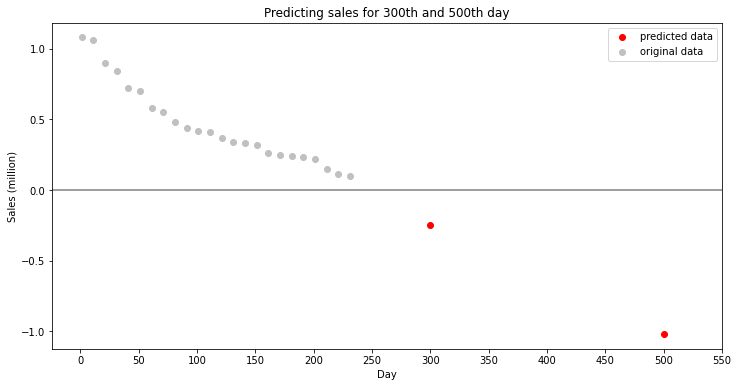

In [10]:
#put the predicted data into the graph
plt.figure(figsize=(12,6))
plt.scatter(pred_df['Day'], pred_df['Sales (million)'], color='red', label='predicted data')
plt.scatter(x_data, y_data,  color='silver', label='original data')
plt.xlabel('Day')
plt.ylabel('Sales (million)')
plt.axhline(y=0, color='grey', linestyle='-')
plt.title("Predicting sales for 300th and 500th day", fontdict=None, loc='center', pad=None)
plt.xticks([i for i in range(0,600,50)])
plt.legend()
plt.show()

## Step 2: Model training and prediction (part 2):
1. The annalysis using a linear regression model described above gives us a reasonable result, but trying a more sophisticated model can further help us decide if the model chosen above is the most suitable. 

2. We can try raise the order of linear regression model to see if it results in underfitting or overfitting. 

3. The power for the x variable is raised to 2.

**The result of the data visulization demonstrates that the polinomial model overfits the data, so the simple linear regression used above suffices for this data set.**

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
#Transform the data for polynomial linear regression
pr = PolynomialFeatures(degree=2)
x_data_pr = pr.fit_transform(x_data)

#Use LinearRegression to train the model
poly = LinearRegression()
poly.fit(x_data_pr, y_data)

LinearRegression()

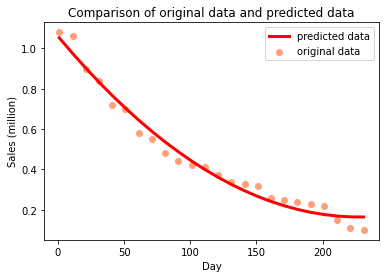

In [13]:
#Visualize the original data and predicted data
plt.scatter(x_data, y_data, color='lightsalmon', label='original data')
plt.plot(x_data, poly.predict(x_data_pr), color='red', linewidth=3, label='predicted data')
plt.xlabel('Day')
plt.ylabel('Sales (million)')
plt.title("Comparison of original data and predicted data", fontdict=None, loc='center', pad=None)
plt.legend()

## Step 3: Reporting the analysis

In [37]:
#refer to the PDF report